In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [4]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for i_episode in range(1, num_episodes + 1):
        # Print out which episode we're on, useful for debugging.
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes))
            sys.stdout.flush()

        # Generate an episode.
        # An episode is an array of (state, action, reward) tuples
        episode = []
        state = env.reset()
        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state

        # Find all states the we've visited in this episode
        # We convert each state to a tuple so that we can use it as a dict key
        states_in_episode = set([tuple(x[0]) for x in episode])
        for state in states_in_episode:
            # Find the first occurance of the state in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == state)
            # Sum up all rewards since the first occurance
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])
            # Calculate average return for this state over all sampled episodes
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]

    return V    

In [5]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

Episode 1000/10000.
Episode 2000/10000.
Episode 3000/10000.
Episode 4000/10000.
Episode 5000/10000.
Episode 6000/10000.
Episode 7000/10000.
Episode 8000/10000.
Episode 9000/10000.
Episode 10000/10000.


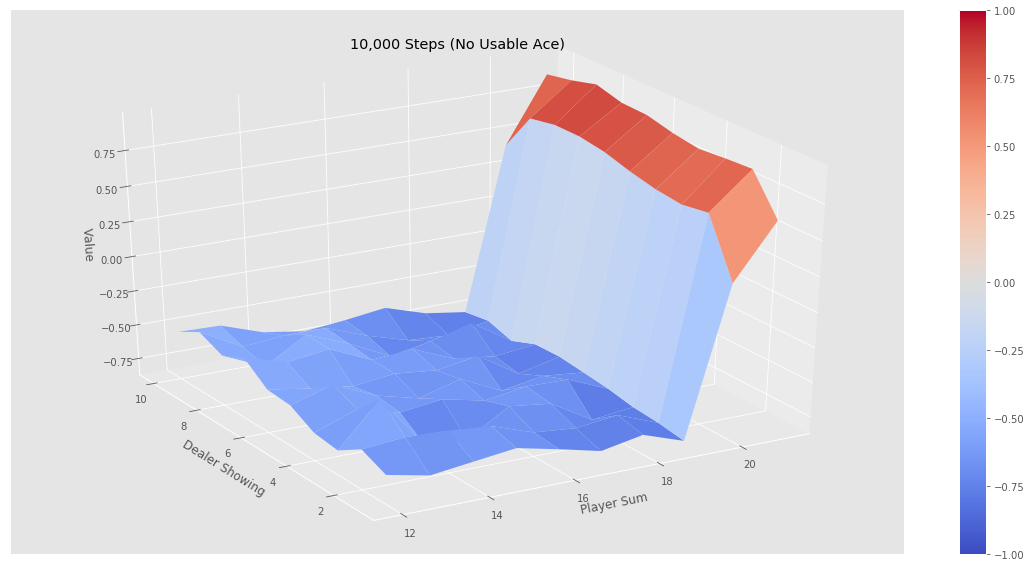

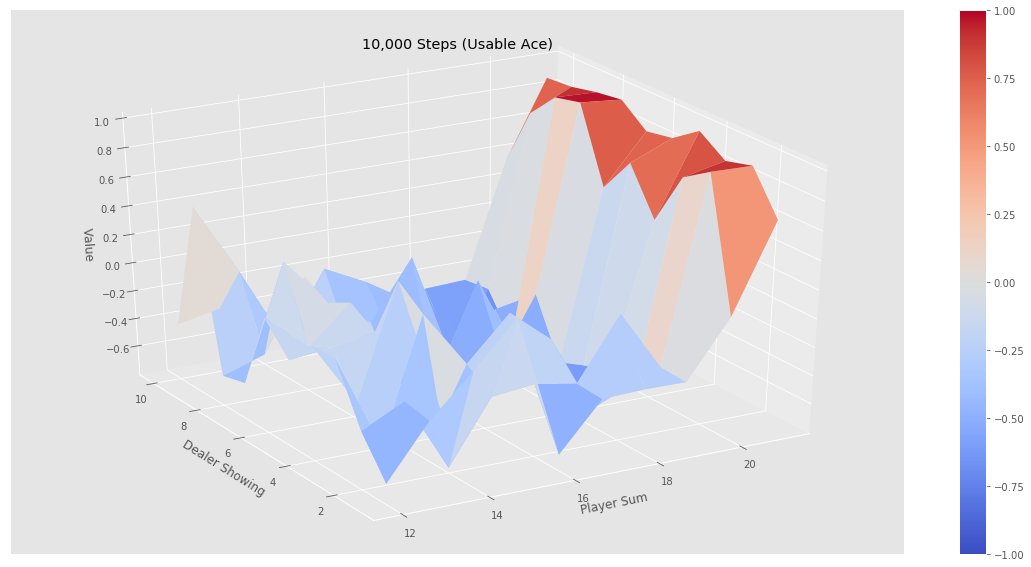

Episode 1000/500000.
Episode 2000/500000.
Episode 3000/500000.
Episode 4000/500000.
Episode 5000/500000.
Episode 6000/500000.
Episode 7000/500000.
Episode 8000/500000.
Episode 9000/500000.
Episode 10000/500000.
Episode 11000/500000.
Episode 12000/500000.
Episode 13000/500000.
Episode 14000/500000.
Episode 15000/500000.
Episode 16000/500000.
Episode 17000/500000.
Episode 18000/500000.
Episode 19000/500000.
Episode 20000/500000.
Episode 21000/500000.
Episode 22000/500000.
Episode 23000/500000.
Episode 24000/500000.
Episode 25000/500000.
Episode 26000/500000.
Episode 27000/500000.
Episode 28000/500000.
Episode 29000/500000.
Episode 30000/500000.
Episode 31000/500000.
Episode 32000/500000.
Episode 33000/500000.
Episode 34000/500000.
Episode 35000/500000.
Episode 36000/500000.
Episode 37000/500000.
Episode 38000/500000.
Episode 39000/500000.
Episode 40000/500000.
Episode 41000/500000.
Episode 42000/500000.
Episode 43000/500000.
Episode 44000/500000.
Episode 45000/500000.
Episode 46000/50000

Episode 362000/500000.
Episode 363000/500000.
Episode 364000/500000.
Episode 365000/500000.
Episode 366000/500000.
Episode 367000/500000.
Episode 368000/500000.
Episode 369000/500000.
Episode 370000/500000.
Episode 371000/500000.
Episode 372000/500000.
Episode 373000/500000.
Episode 374000/500000.
Episode 375000/500000.
Episode 376000/500000.
Episode 377000/500000.
Episode 378000/500000.
Episode 379000/500000.
Episode 380000/500000.
Episode 381000/500000.
Episode 382000/500000.
Episode 383000/500000.
Episode 384000/500000.
Episode 385000/500000.
Episode 386000/500000.
Episode 387000/500000.
Episode 388000/500000.
Episode 389000/500000.
Episode 390000/500000.
Episode 391000/500000.
Episode 392000/500000.
Episode 393000/500000.
Episode 394000/500000.
Episode 395000/500000.
Episode 396000/500000.
Episode 397000/500000.
Episode 398000/500000.
Episode 399000/500000.
Episode 400000/500000.
Episode 401000/500000.
Episode 402000/500000.
Episode 403000/500000.
Episode 404000/500000.
Episode 405

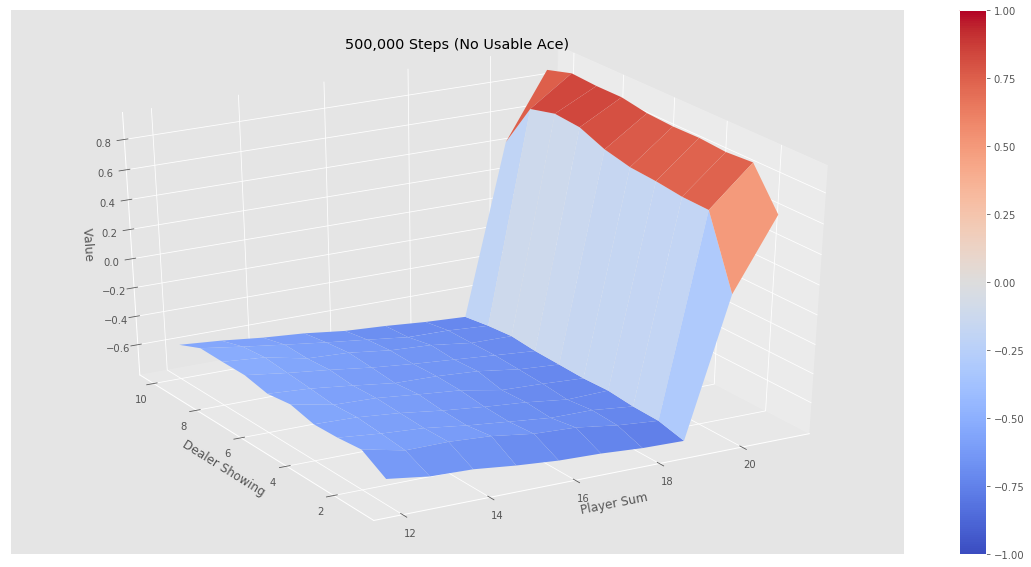

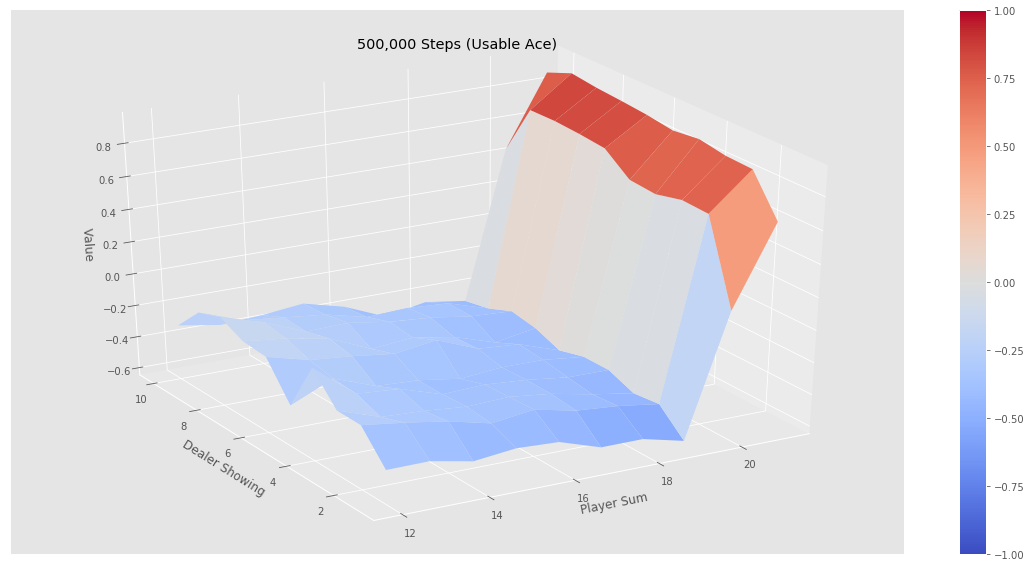

In [6]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")